# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

x_train2=np.array(x_train).copy()
x_test2=np.array(x_test).copy()


### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

+ after train and test split i added 1 column of ones to the all x value and make the of size 5 from their original size 4 to handle a constants in linear regression.
+ since all feature are alread normalaized to 0 to 1 so no need to normalaize it further.
+ fixed a learning rate, epochs and initial w (vector containing the coffiecient values)
+ then repeated the following steps this epoch number of times
    + by matrix multiplication of `training_data` and `w` i have calculated hypothesis value
    + used `y_true` and `hypothesis_value` to minimizes the cost function 
    + calculated the new values of coffiecient using w=w-learning_rate*delta_w, where w is coffiecients and delta_w if `((hypothesis_value-y_true).T,(hypothesis_value-y_true))/(2*M)`.

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [3]:
# implement Linear Regression
def hypothesis(x, w):
    return np.matmul(x, w)

def cost_function(x, y, w):
    return (np.matmul((hypothesis(x, w)-y).T,(hypothesis(x, w)-y)))/(2*y.shape[0])

def mse(x,w,y_true):
    y_pred=hypothesis(x,w)
    val=(y_true-y_pred)**2
    return np.mean(val)

def gradiant(x, y, w,learning_rate,epoch):
    m=x.shape[0]
    arr=[]
    for i in range(epoch):
        h=hypothesis(x,w)
        cost=np.matmul(x.T,(h-y))/m
        w=w-learning_rate*cost
        cc=cost_function(x,y,w)
        ccd=mse(x,w,y)
        arr.append(ccd)
        # arr.append(cc[0])
    return w,arr


In [4]:
for i in range(len(x_train)):
    x_train[i] = np.array([1]+x_train[i])
for i in range(len(x_test)):
    x_test[i] = np.array([1]+x_test[i])

x_train=np.array(x_train)
y_train=np.array(y_train).reshape(-1,1)
x_test=np.array(x_test)
y_test=np.array(y_test).reshape(-1,1)

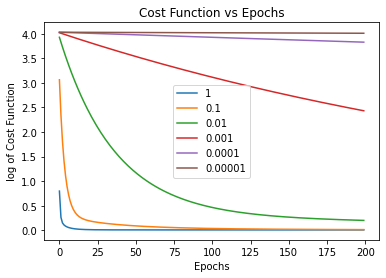

In [6]:
learning_rates = [1,0.1,0.01,0.001,0.0001,0.00001]
epochs = 200
for learning_rate in learning_rates:
    w = np.zeros((x_train.shape[1], 1))
    w,cost_array = gradiant(x_train, y_train, w, learning_rate, epochs)
    plt.plot((cost_array))
plt.title('Cost Function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('log of Cost Function')
plt.legend(['1','0.1','0.01', '0.001', '0.0001', '0.00001'])
plt.show()

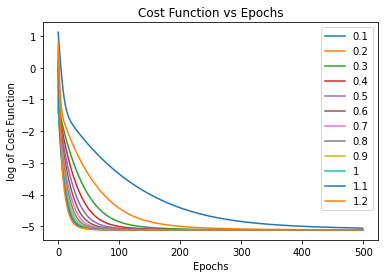

In [7]:
learning_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2]
epochs = 500
for learning_rate in learning_rates:
    w = np.zeros((x_train.shape[1], 1))
    w,cost_array = gradiant(x_train, y_train, w, learning_rate, epochs)
    plt.plot(np.log(cost_array))
plt.title('Cost Function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('log of Cost Function')
plt.legend([str(x) for x in learning_rates])
plt.show()

MSE for Train : 0.00605375104172574
MSE for test : 0.005053286011017289


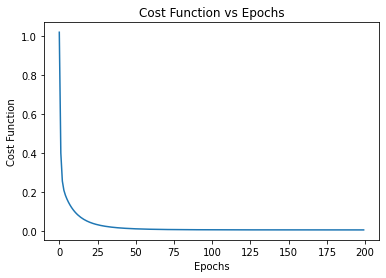

In [8]:
w = np.zeros((x_train.shape[1], 1))
w,cost_array = gradiant(x_train, y_train, w, 0.4, 200)
plt.plot(cost_array)
print("MSE for Train :",np.min(cost_array))
print("MSE for test :",mse(x_test,w,y_test))
plt.title('Cost Function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost Function')
plt.show()


For epoch = 200
+ best learning rate = 0.4
+ MSE for Train : 0.00605375104172574
+ MSE for Test  : 0.005053286011017289

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

[0.00219397]


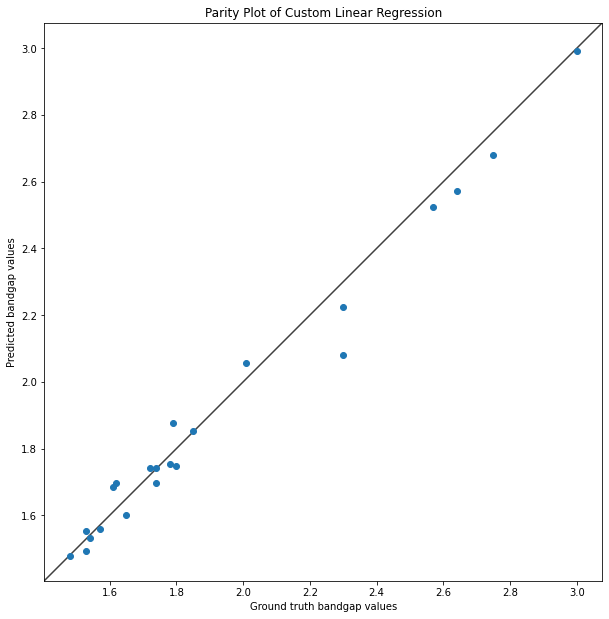

In [9]:
# Get the predictions of x_test into `y_pred`
w,cost_array = gradiant(x_train, y_train, w, 0.4, 200)
print(cost_function(x_test, y_test, w)[0])
y_pred = hypothesis(x_test, w)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))
ax.scatter(y_test, y_pred)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),np.max([ax.get_xlim(), ax.get_ylim()]),]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
#### 2.2.1 Explain Ridge regression briefly in 1-2 lines.
Ridge regression adds penalty term to the cost function which is the sum of square of the coefficients. <br/>
    `cost_function = summation((y_i - wx)*(y_i - wx)) + lamda*summation((w_i*w_i))` <br/>
As the value of coefficients increases from 0 this cost function increases which leads to decrease in the value of coefficients in order to reduce loss.


2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [59]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import tabulate
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
alphas=[0.000001,0.0001,0.0005,0.00075,0.001,0.002,0.0025,0.005,0.0075,0.01,0.05,0.1,0.5,1,2,5,10]
rmse = []
coffiecients=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train,y_train)
    coffiecients.append(ridge.coef_)
    y_pred = ridge.predict(x_test)
    rmse.append(mean_squared_error(y_test, y_pred, squared=False))

In [61]:
arr=[]
arr.append(["Alpha","RMSE","Cofficients"])
for i in range(len(alphas)):
    arr.append([alphas[i],rmse[i],coffiecients[i][0]])
table = tabulate.tabulate(arr,tablefmt='fancy_grid')
print(table)

╒═════════╤═════════════════════╤══════════════════════════════════════════════════════════════════╕
│ Alpha   │ RMSE                │ Cofficients                                                      │
├─────────┼─────────────────────┼──────────────────────────────────────────────────────────────────┤
│ 1e-06   │ 0.06582579613909423 │ [ 0.         -0.02327289 -0.14314781  1.51307445  0.60164078]    │
├─────────┼─────────────────────┼──────────────────────────────────────────────────────────────────┤
│ 0.0001  │ 0.06583093432284381 │ [ 0.         -0.02327362 -0.14316153  1.51303698  0.60162686]    │
├─────────┼─────────────────────┼──────────────────────────────────────────────────────────────────┤
│ 0.0005  │ 0.06585170304319088 │ [ 0.         -0.02327661 -0.14321694  1.51288561  0.60157064]    │
├─────────┼─────────────────────┼──────────────────────────────────────────────────────────────────┤
│ 0.00075 │ 0.0658646903080039  │ [ 0.         -0.02327847 -0.14325156  1.51279102  0.60153

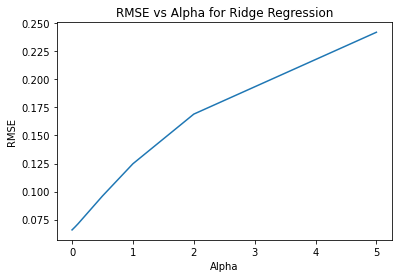

In [56]:
plt.plot(alphas,rmse)
plt.title('RMSE vs Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()

+ CASE 1: Alpha is close to zero: the effect from sum of square of coefficients in cost function term itself is very small and thus the final error is based on `summation((y_i - wx)*(y_i - wx))` alone. 
+ CASE 2: Alpha is too large: the impact of sum of square of coefficients in cost function term grows and the coefficients tends to zero.

### 2.3 Implement Lasso regression
#### 2.3.1 Explain Lasso regression briefly in 1-2 lines.<br/>
+ Lasso regression adds penalty term to the cost function which is the absolute sum of the coefficients. <br/>
        `cost_function = summation((y_i - wx)*(y_i - wx)) + lamda*summation(abs(w_i))` <br/>
+ As the value of coefficients increases from 0 this cost function increases which leads to decrease in the value of coefficients in order to reduce loss.<br/>
+ Lasso regression not only helps in reducing over-fitting but it can help us in feature selection

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [62]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
alphas=[0.000001,0.0001,0.0005,0.00075,0.001,0.002,0.0025,0.005,0.0075,0.01,0.05,0.1,0.5,1,2,5]
rmse = []
coffiecients=[]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train,y_train)
    coffiecients.append(lasso.coef_)
    y_pred = lasso.predict(x_test)
    rmse.append(mean_squared_error(y_test, y_pred, squared=False))

In [64]:
arr=[]
arr.append(["Alpha","RMSE","Cofficients"])
for i in range(len(alphas)):
    arr.append([alphas[i],rmse[i],coffiecients[i]])
table = tabulate.tabulate(arr,tablefmt='fancy_grid')
print(table)

╒═════════╤═════════════════════╤═══════════════════════════════════════════════════════════════╕
│ Alpha   │ RMSE                │ Cofficients                                                   │
├─────────┼─────────────────────┼───────────────────────────────────────────────────────────────┤
│ 1e-06   │ 0.06583077753435113 │ [ 0.         -0.02327378 -0.14315979  1.51304913  0.60162407] │
├─────────┼─────────────────────┼───────────────────────────────────────────────────────────────┤
│ 0.0001  │ 0.06611759787681841 │ [ 0.         -0.02187496 -0.14284587  1.51156023  0.60010892] │
├─────────┼─────────────────────┼───────────────────────────────────────────────────────────────┤
│ 0.0005  │ 0.06732740359248054 │ [ 0.         -0.01610299 -0.14145529  1.50562962  0.59399945] │
├─────────┼─────────────────────┼───────────────────────────────────────────────────────────────┤
│ 0.00075 │ 0.06813726780413569 │ [ 0.         -0.01249552 -0.14058618  1.50192299  0.59018103] │
├─────────┼─────────

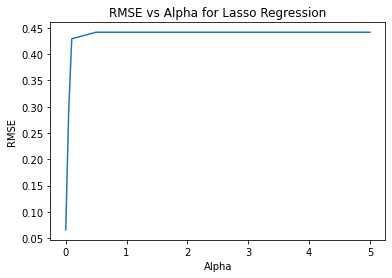

In [48]:
plt.plot(alphas,rmse)
plt.title('RMSE vs Alpha for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()

+ CASE 1: Alpha is close to zero: the effect from sum of absolute of coefficients in cost function term itself is very small and thus the final error is based on `summation((y_i - wx)*(y_i - wx))` alone.
+ CASE 2: Alpha is too large: the impact  sum of absolute of coefficients in cost function term grows hence and the most coefficients are end up to zero.
+ There is a sudden increase in rmse in alpha range [0.01-0.1]